# **Đọc thư viện**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# **Đọc và mô tả file dữ liệu**

In [2]:
data=pd.read_csv('/content/Loan_Default.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [3]:
print(data.describe())

                  ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%       

# **Cleanning data**

In [4]:
drop_cols = [
    'ID',                     # Không có ý nghĩa do không có liên hệ với status
    'year',                   # Có một năm duy nhất là 2019 nên bỏ qua
    'Interest_rate_spread',   # Missing data quá nhiều (36639)
    'property_value',         # Missing data quá nhiều (15098)
    'Upfront_charges',        # Missing data quá nhiều (39642)
    'dtir1'                   # dtir1 (Debt-to-Income ratio) = debt / income (Giữ hai cái kia và bỏ cái dtir 1 vì dễ bị đa cộng tuyến)
]
data.drop(columns=drop_cols, inplace=True, errors='ignore')

In [5]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

/tmp/ipython-input-834479767.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-834479767.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [6]:
before = data.shape[0]
data.drop_duplicates(inplace=True)
print(f"Đã loại {before - data.shape[0]} dòng trùng, còn lại {data.shape[0]}.")

Đã loại 0 dòng trùng, còn lại 148670.


# **Normalization**

In [7]:
if 'age' in data.columns:
    data['age'] = data['age'].replace({
        '35-44': 39.5, '25-34': 29.5, '55-64': 59.5,
        '45-54': 49.5, '65-74': 69.5, '>74': 80, '<25': 20
    })

/tmp/ipython-input-712569982.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['age'] = data['age'].replace({


In [8]:
data['rate_of_interest']=data['rate_of_interest']/1200

# **Heatmap tương quan theo biến định lượng**

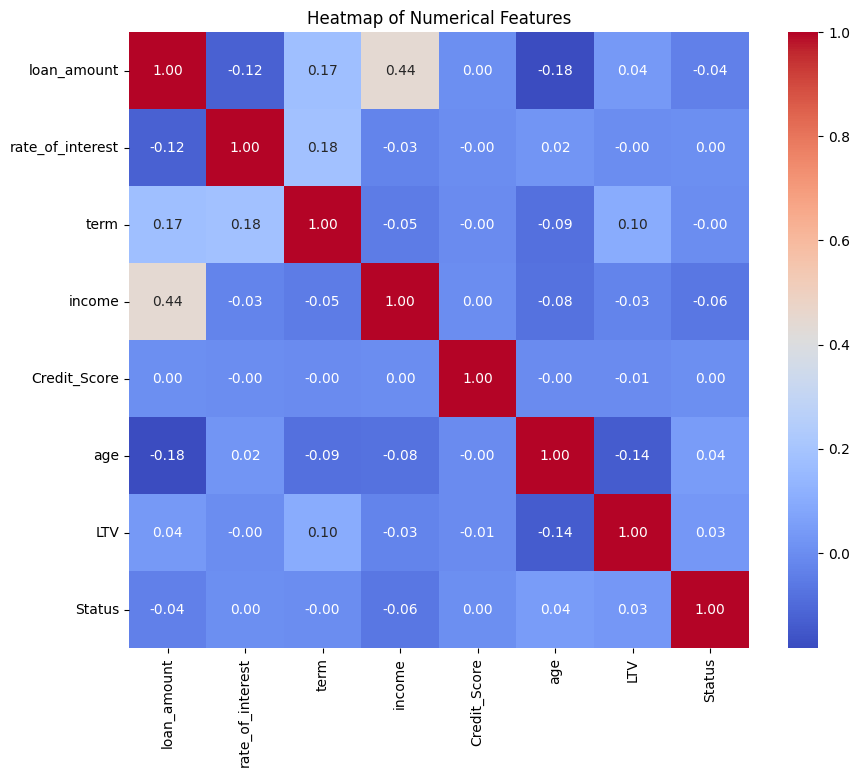

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Numerical Features")
plt.show()

# **Countplot các biến định tính theo Status**

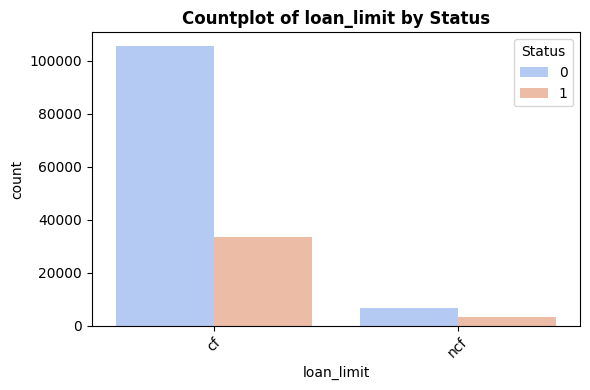

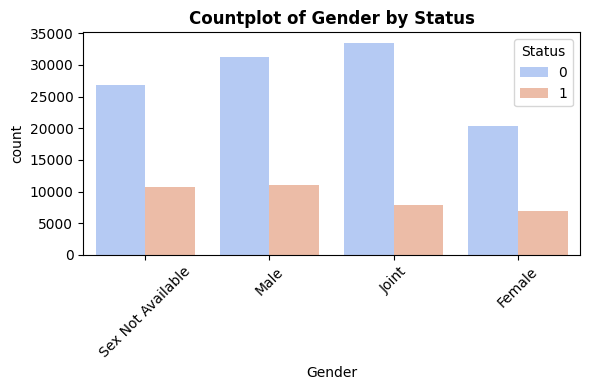

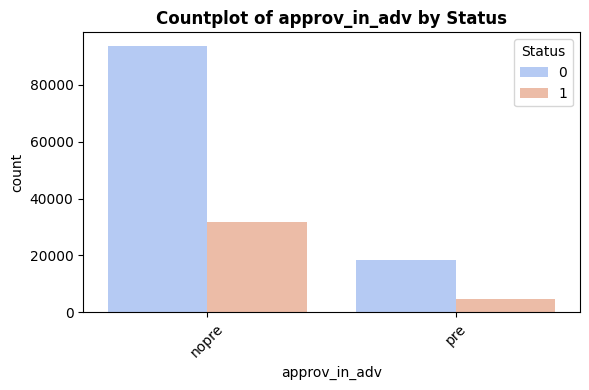

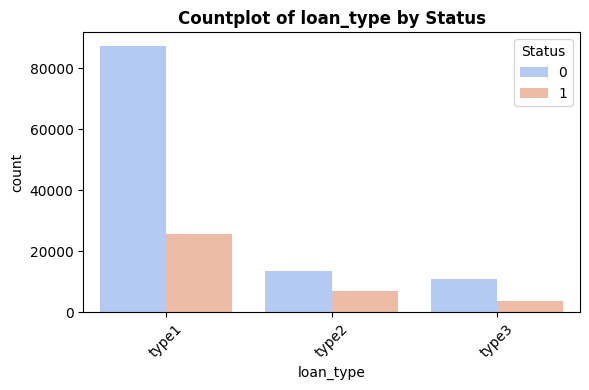

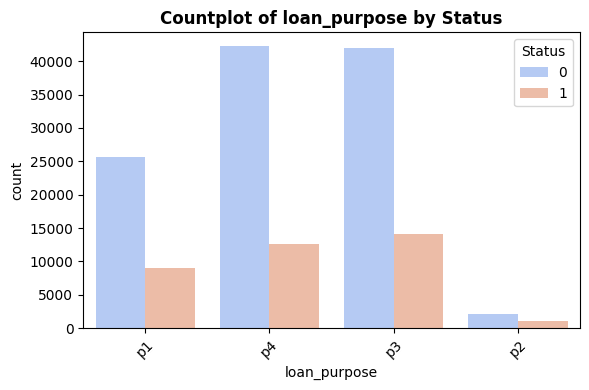

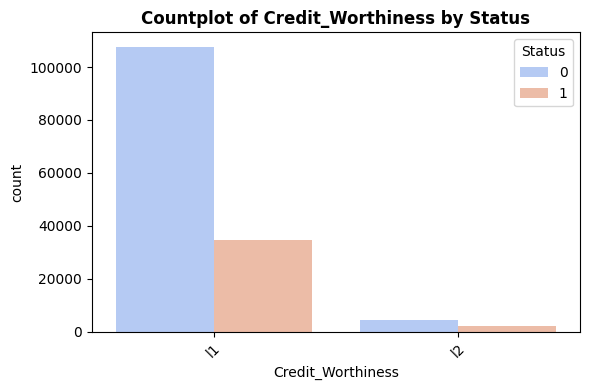

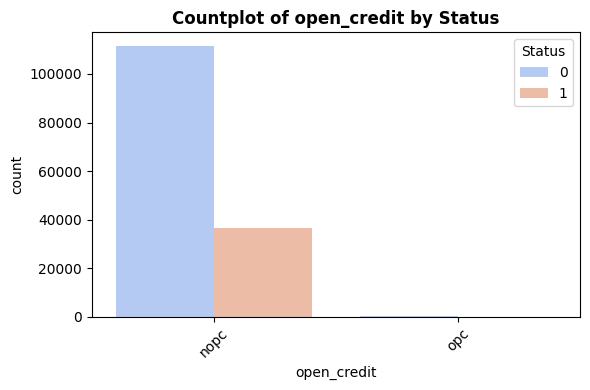

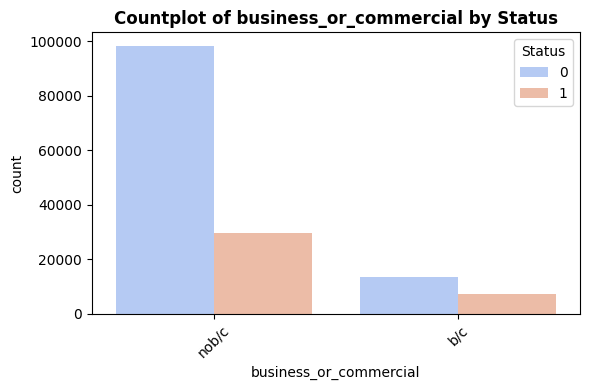

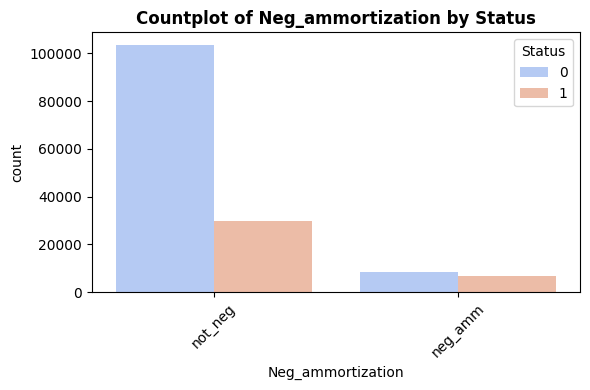

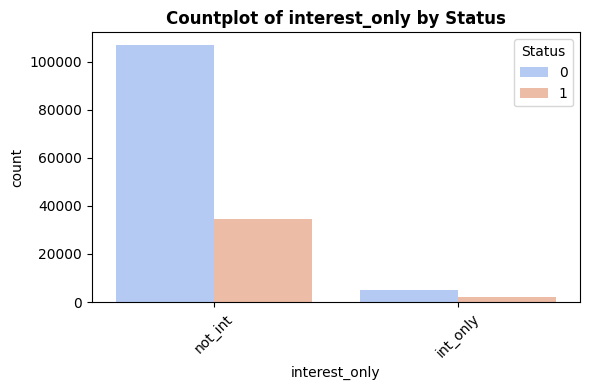

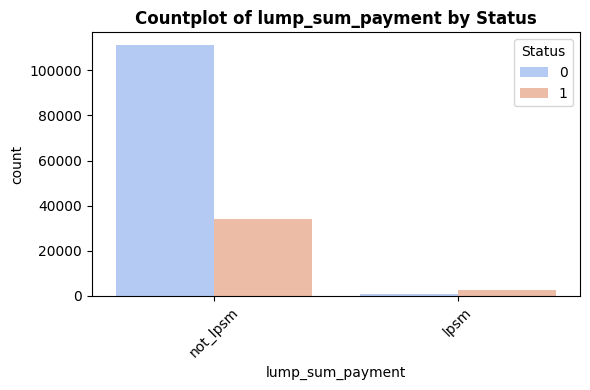

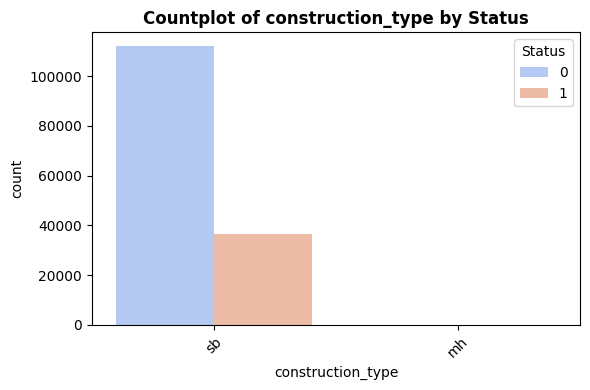

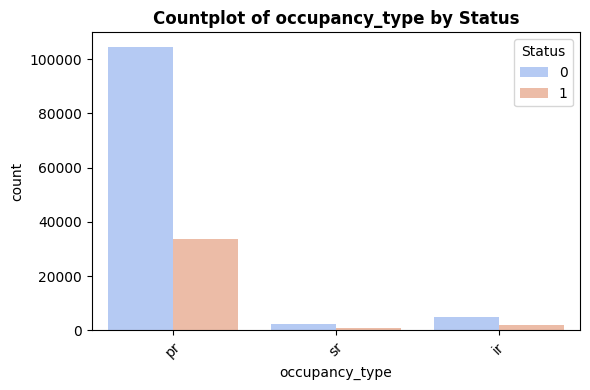

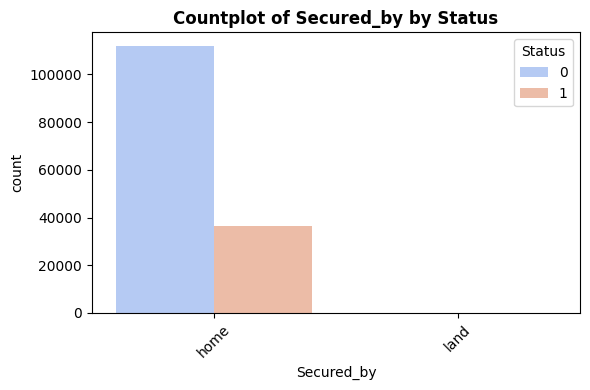

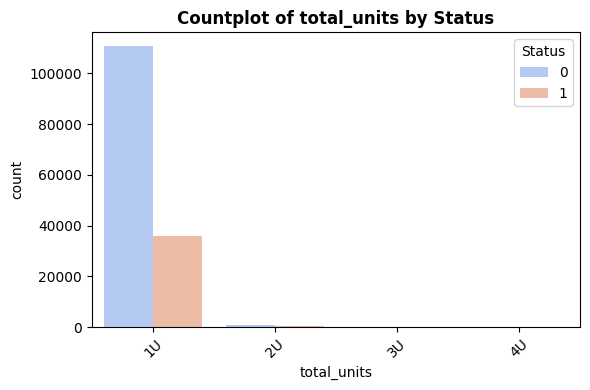

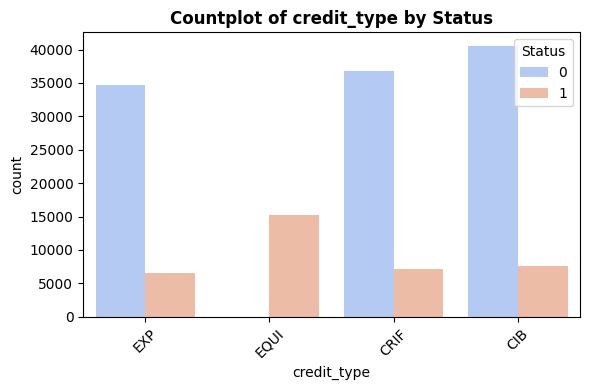

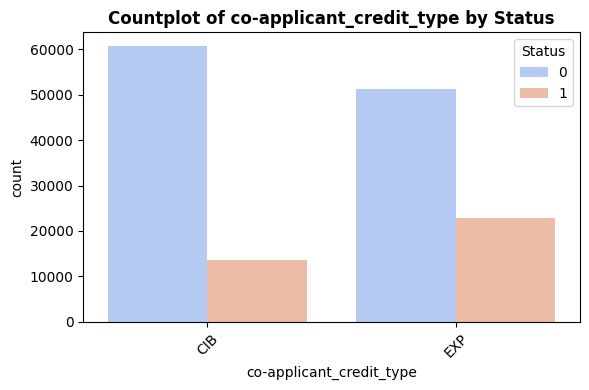

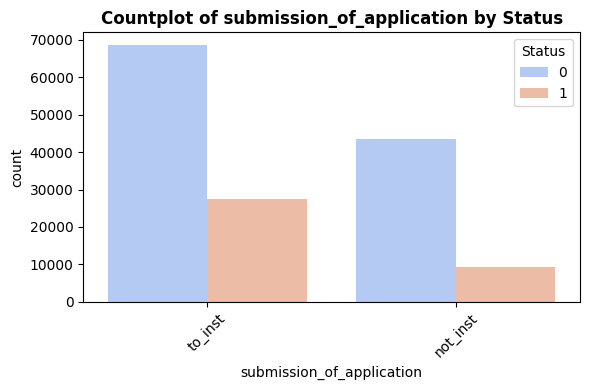

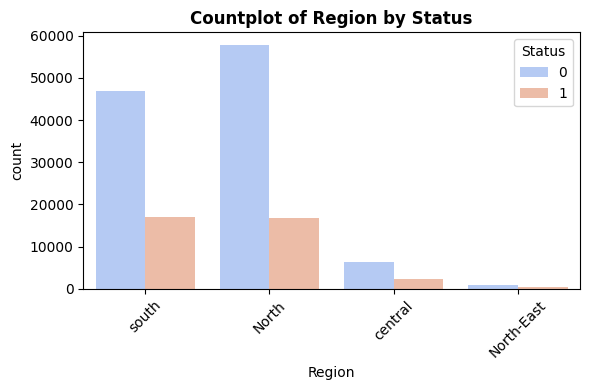

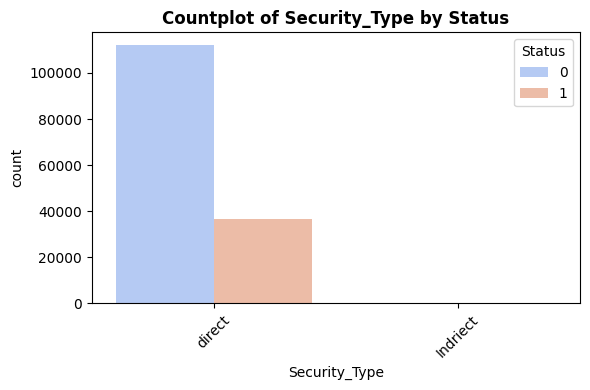

In [10]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
palette = sns.color_palette("coolwarm", n_colors=2)
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='Status', palette=palette)
    plt.title(f"Countplot of {col} by Status", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
from google.colab import files
data.to_csv('dataset_clean.csv', index=False)
files.download('dataset_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>